# Azimuth- elevation maps

This is a test program where we will plot azimuth vs elevation for all satellites which covered the sky the day the caribbean meteor was detected, then compare it with the meteor trajectory in order to estimate which satellites really observed the meteor passage and which ones detected other phenomena (or nothing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import pandas as pd

## Read data file (Test with BARA station data)

In [2]:
f = open("./data/2019-06-22/set1/bara173-2019-06-22.Cmn", "r")

In [3]:
f.readline()
f.readline()
f.readline()
f.readline()

'\n'

In [4]:
data = f.readlines()

In [5]:
tab = Table.read(data, format="ascii")
sns.set_style("whitegrid")

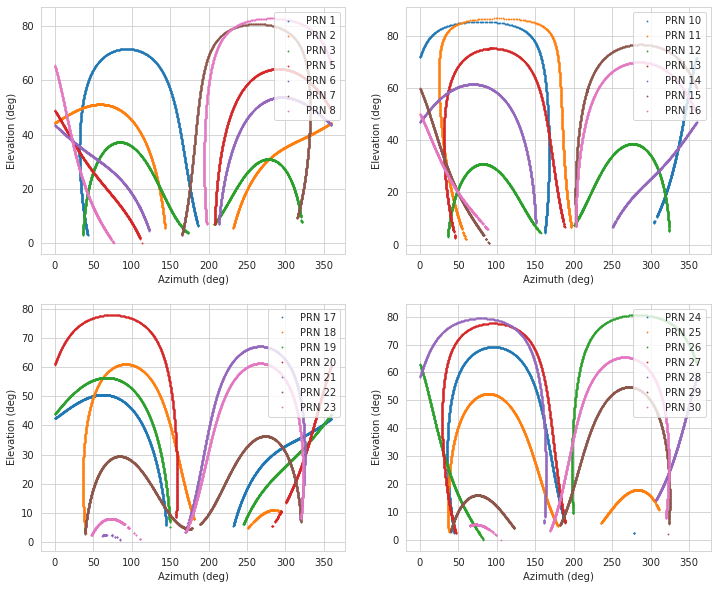

In [6]:
Az, Ele = tab["Az"], tab["Ele"]
prn_list1 = np.unique(tab["PRN"])[0:8]
prn_list2 = np.unique(tab["PRN"])[8:15]
prn_list3 = np.unique(tab["PRN"])[15:24]
prn_list4 = np.unique(tab["PRN"])[22:31]
#prn_list = [1,2,3,5,6,7,8] 
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
for p1, p2, p3, p4 in zip(prn_list1, prn_list2, prn_list3, prn_list4):
    prn_mask1 = tab["PRN"] ==p1
    prn_mask2 = tab["PRN"] ==p2
    prn_mask3 = tab["PRN"] ==p3
    prn_mask4 = tab["PRN"] ==p4
    ax1.plot(Az[prn_mask1], Ele[prn_mask1], "o", ms=0.8, label = "PRN {}".format(p1))
    ax2.plot(Az[prn_mask2], Ele[prn_mask2], "o", ms=0.8, label = "PRN {}".format(p2))
    ax3.plot(Az[prn_mask3], Ele[prn_mask3], "o", ms=0.8, label = "PRN {}".format(p3))
    ax4.plot(Az[prn_mask4], Ele[prn_mask4], "o", ms=0.8, label = "PRN {}".format(p4))
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax1.set_xlabel("Azimuth (deg)")
ax1.set_ylabel("Elevation (deg)")
ax2.set_xlabel("Azimuth (deg)")
ax2.set_ylabel("Elevation (deg)")
ax3.set_xlabel("Azimuth (deg)")
ax3.set_ylabel("Elevation (deg)")
ax4.set_xlabel("Azimuth (deg)")
ax4.set_ylabel("Elevation (deg)")
#ax1.plot(Lon, Lat, "r.")
#ax1.plot(Lon0, Lat0, "m*", ms=10)
#ax1.plot(x,y, "k")
#ax2.plot(Lon, Lat, "r.")
#ax2.plot(Lon0, Lat0, "m*", ms=10)
#ax2.plot(x,y, "k")
#ax3.plot(Lon, Lat, "r.")
#ax3.plot(Lon0, Lat0, "m*", ms=10)
#ax3.plot(x,y, "k")
#ax4.plot(Lon, Lat, "r.")
#ax4.plot(Lon0, Lat0, "m*", ms=10)
#ax4.plot(x,y, "k")
fig.set_size_inches(12,10)
#plt.legend(loc="upper right")

In [7]:
#plt.plot(Az[tab["PRN"] ==24], Ele[tab["PRN"] ==24], "o", ms=0.8, label = "PRN {}".format(p1))

## Meteor trajectory

Now its time to estimate the meteor trajectory from available data

### From USG data

Meteor initial position:

- Latitude: $14.9^\circ$
- Longitude: $-66.2^\circ$
    
Meteor velocity components:

- $v_x = -13.4~\mathrm{km/s}$ 
- $v_y = 6.0~ \mathrm{km/s}$
- $v_z = 2.5~ \mathrm{km/s}$

Where $v_x$ is parallel to the equatorial plane, $v_z$ is parallel to the earth's rotation axis and $v_y$ completes the  right handed othonormal coordinate system.

Meteor height: $25~km$

Radius of Earth: $6371~km$

### Velocity components parallel to latitude and longitude

In [8]:
v_eq = np.array((-13.4))
Lat0, Lon0 = 14.9, -66.2
v_lat = np.array((2.5*np.cos(np.radians(Lat0))- 6.0*np.sin(np.radians(Lat0))))
t = np.linspace(0, 4.5)
re, h = 6371, 25
x, y = np.degrees(v_eq/(re+h)*t)+Lon0, np.degrees(v_lat/(re+h)*t)+Lat0

## Estimated trajectory

To plot an estimated trajectory we need either to convert distance units from kilometers to deg, for that we must divide by radius of earth + meteor height

### From GLM data

The bolide trajectory was also recorded by GLM. Lasted 4.5 seconds

In [9]:
GLM_data = pd.read_csv("./data/2019-06-22/GLM16-data.csv", header = 9)
GLM_data.head(5)

,time (ms),longitude,latitude,energy (joules)
0,1561238745265,-65.776215,14.906006,1.525970e-15
1,1561238745468,-65.807884,14.905684,4.577910e-15
2,1561238745470,-65.810646,14.905668,3.051940e-15
3,1561238745472,-65.811707,14.905637,4.577910e-15
4,1561238745474,-65.822113,14.905485,4.577910e-15


In [10]:
Lat, Lon = GLM_data["latitude"], GLM_data["longitude"]

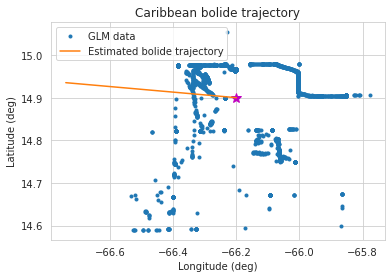

In [11]:
plt.plot(Lon, Lat, ".", label = "GLM data")
slat, slon = 18.21, -71.09
plt.plot(Lon0, Lat0, "m*", ms=10)
#plt.plot(slon, slat, "g*")
#plt.quiver(Lon0, Lat0, v_eq/50, v_lat/50, units="xy", scale=1, color="blue")
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.plot(x,y, label="Estimated bolide trajectory")
plt.title("Caribbean bolide trajectory")
plt.legend()
plt.savefig("./paper/figures/bolide-trajectory.pdf")

## Now it is time to change coordinates

We need the station coordiantes:

BARA: (18.21, -71.09)
The coordinates transform is given by:
\begin{equation}
\sin(Ele) = \sin(\delta)\sin(Lat)+\cos(Lat)\cos(Ha)\cos\delta
\end{equation}
\begin{equation}
\cos(A) = \frac{\sin(\delta)-\sin(Ele)\sin(Lat)}{\cos(Ele)\cos(Lat)}
\end{equation}
If $\sin(Ha) <0$ then $Az = A$ 

else:
$$Az = 360-A$$
Where:
- $(Az, Ele)$ are the elevation and azimuth of the object (the solution) 
- $(\delta, Ha)$ are the declination (latitude) and hour angle of the object (data)
- $Lat$ is the latitude of the observer (station)

### Converting longitude into hour angle

If we observe the event at the longitude descripted by data, we should observe it at zenith (zero hour angle), so the question is that what is the hour angle from the station point of view?

Hour angle equation:
\begin{equation}
Ha = LST - RA
\end{equation}
From observer "in situ" point of view:
\begin{equation}
0 = LST_{z} - RA
\end{equation}
From station point of view:
\begin{equation}
Ha = LST_s - RA
\end{equation}


Substracting both equations:
\begin{equation}
Ha = LST_s -LST_z
\end{equation}
Where $LST_s$ is the local ~~sidereal~~ time of station and $LST_z$ is the local ~~sidereal~~ time of the place where meteor was detected.
In general:
$$LST = 100.46 + 0.985647 * d + long + 15*UT$$
With this definition the hour angle should be calculated as follows:
$$Ha = Lon_s - Lon_z$$
Since the rest of the term are cancelled each other. Let's try this formulae!!!

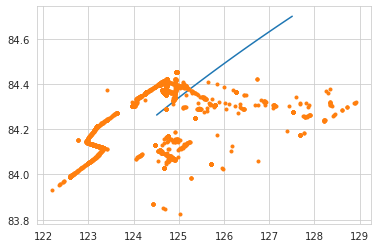

In [12]:
ha = -71.09 - x
sinELE = np.sin(np.radians(y))*np.sin(np.radians(18.21))+np.cos(np.radians(y))*np.cos(np.radians(18.21))*np.cos(np.radians(ha))
cosELE = np.sqrt(1-sinELE**2)
cosA = (np.sin(np.radians(y))-sinELE*np.sin(np.radians(18.21)))/(cosELE*np.cos(np.radians(18.21)))
ELE = np.degrees(np.arcsin(sinELE))
A = np.degrees(np.arccos(cosA))
GLM_ha = -71.09 - Lon
GLM_sinele = np.sin(np.radians(Lat))*np.sin(np.radians(18.21))+np.cos(np.radians(Lat))*np.cos(np.radians(18.21))*np.cos(np.radians(GLM_ha))
GLM_cosele = np.sqrt(1-GLM_sinele**2)
GLM_cosA = (np.sin(np.radians(Lat))-GLM_sinele*np.sin(np.radians(18.21)))/(GLM_cosele*np.cos(np.radians(18.21)))
GLM_A = np.degrees(np.arccos(GLM_cosA))
GLM_ele = np.degrees(np.arcsin(GLM_sinele))
plt.plot(A,ELE)
plt.plot(GLM_A, GLM_ele, ".")

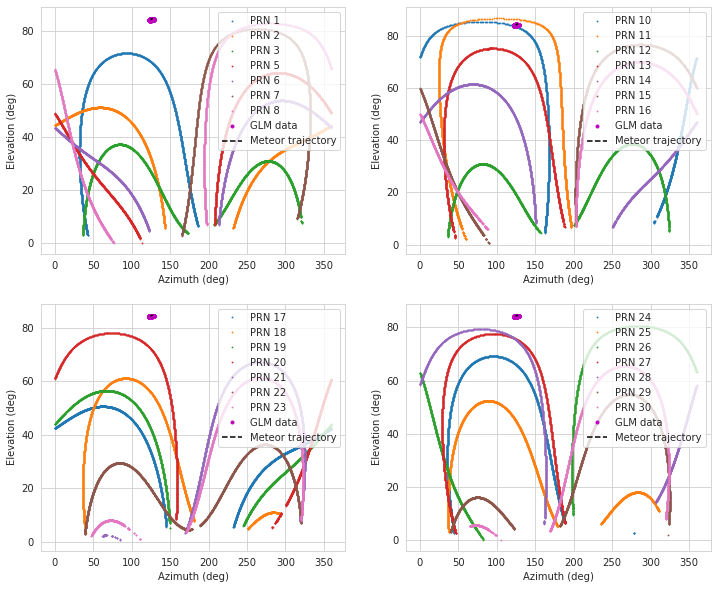

In [13]:
Az, Ele = tab["Az"], tab["Ele"]
prn_list1 = np.unique(tab["PRN"])[0:8]
prn_list2 = np.unique(tab["PRN"])[8:15]
prn_list3 = np.unique(tab["PRN"])[15:24]
prn_list4 = np.unique(tab["PRN"])[22:31]
#prn_list = [1,2,3,5,6,7,8] 
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
for p1, p2, p3, p4 in zip(prn_list1, prn_list2, prn_list3, prn_list4):
    prn_mask1 = tab["PRN"] ==p1
    prn_mask2 = tab["PRN"] ==p2
    prn_mask3 = tab["PRN"] ==p3
    prn_mask4 = tab["PRN"] ==p4
    ax1.plot(Az[prn_mask1], Ele[prn_mask1], "o", ms=0.8, label = "PRN {}".format(p1))
    ax2.plot(Az[prn_mask2], Ele[prn_mask2], "o", ms=0.8, label = "PRN {}".format(p2))
    ax3.plot(Az[prn_mask3], Ele[prn_mask3], "o", ms=0.8, label = "PRN {}".format(p3))
    ax4.plot(Az[prn_mask4], Ele[prn_mask4], "o", ms=0.8, label = "PRN {}".format(p4))  
ax1.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax2.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax3.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax4.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax1.plot(A,ELE, "k--", label="Meteor trajectory")   
ax2.plot(A,ELE, "k--", label="Meteor trajectory")  
ax3.plot(A,ELE, "k--", label="Meteor trajectory")   
ax4.plot(A,ELE, "k--", label="Meteor trajectory") 
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax1.set_xlabel("Azimuth (deg)")
ax1.set_ylabel("Elevation (deg)")
ax2.set_xlabel("Azimuth (deg)")
ax2.set_ylabel("Elevation (deg)")
ax3.set_xlabel("Azimuth (deg)")
ax3.set_ylabel("Elevation (deg)")
ax4.set_xlabel("Azimuth (deg)")
ax4.set_ylabel("Elevation (deg)")
#ax1.plot(Lon, Lat, "r.")
#ax1.plot(Lon0, Lat0, "m*", ms=10)
#ax1.plot(x,y, "k")
#ax2.plot(Lon, Lat, "r.")
#ax2.plot(Lon0, Lat0, "m*", ms=10)
#ax2.plot(x,y, "k")
#ax3.plot(Lon, Lat, "r.")
#ax3.plot(Lon0, Lat0, "m*", ms=10)
#ax3.plot(x,y, "k")
#ax4.plot(Lon, Lat, "r.")
#ax4.plot(Lon0, Lat0, "m*", ms=10)
#ax4.plot(x,y, "k")
fig.set_size_inches(12,10)

In [14]:
v_TID_high = 0.362
delta_t = 3600
r_circ = v_TID_high*delta_t
Re = 6371
mh = 25
R = np.degrees(r_circ/(Re+mh))
x_circ, y_circ = R*np.cos(np.linspace(-np.pi, np.pi))+Lon0, R*np.sin(np.linspace(-np.pi, np.pi))+Lat0 

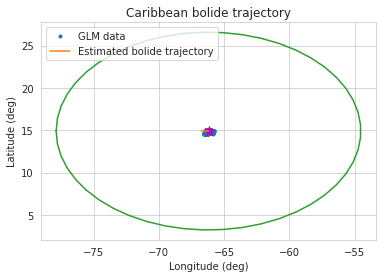

In [15]:
plt.plot(Lon, Lat, ".", label = "GLM data")
plt.plot(Lon0, Lat0, "m*", ms=10)
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.plot(x,y, label="Estimated bolide trajectory")
plt.title("Caribbean bolide trajectory")
plt.legend()
plt.plot(x_circ, y_circ)

In [16]:
def Change_coords(slon, slat, lon, lat):
    """
    Change coordinate from Latitude-Longitude reference system to local Azimuth-Elevation system
    Inputs:
      slon, slat: Coordinates of station (in degrees)
      lon, lat: Coordinates of object (can be an scalar or array, in degrees)
    Output: AZ, ELE, Coordinates of object in local reference system (in degrees)
    """
    HA = slon - lon
    sin_ELE = np.sin(np.radians(lat))*np.sin(np.radians(slat))+np.cos(np.radians(lat))*np.cos(np.radians(slat))*np.cos(np.radians(HA))
    cos_ELE = np.sqrt(1.-sin_ELE**2)
    cosA = (np.sin(np.radians(lat))-sin_ELE*np.sin(np.radians(slat)))/(cos_ELE*np.cos(np.radians(slat)))
    ELE = np.degrees(np.arcsin(sin_ELE))
    A = np.degrees(np.arccos(cosA))
    AZ = []
    for a, ha in zip(A, HA):
        pi_mask = np.sin(np.radians(ha)) <0
        if pi_mask:
            az = a
        else:
            az = 360. - a
        AZ.append(az)
#    if np.sin(HA) <0:
#        AZ = A
#    else:
#        AZ = 360. - A
    return AZ, ELE

In [17]:
aZ_circ, ele_circ = Change_coords(slon, slat, x_circ, y_circ)

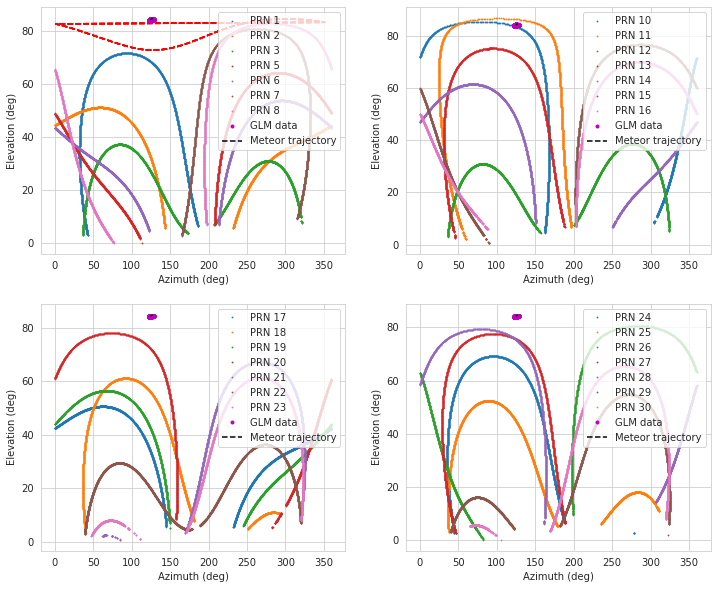

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
for p1, p2, p3, p4 in zip(prn_list1, prn_list2, prn_list3, prn_list4):
    prn_mask1 = tab["PRN"] ==p1
    prn_mask2 = tab["PRN"] ==p2
    prn_mask3 = tab["PRN"] ==p3
    prn_mask4 = tab["PRN"] ==p4
    ax1.plot(Az[prn_mask1], Ele[prn_mask1], "o", ms=0.8, label = "PRN {}".format(p1))
    ax2.plot(Az[prn_mask2], Ele[prn_mask2], "o", ms=0.8, label = "PRN {}".format(p2))
    ax3.plot(Az[prn_mask3], Ele[prn_mask3], "o", ms=0.8, label = "PRN {}".format(p3))
    ax4.plot(Az[prn_mask4], Ele[prn_mask4], "o", ms=0.8, label = "PRN {}".format(p4))
    ax1.plot(aZ_circ, ele_circ, "r--")
ax1.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax2.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax3.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax4.plot(GLM_A, GLM_ele, "m.", label="GLM data")
ax1.plot(A,ELE, "k--", label="Meteor trajectory")   
ax2.plot(A,ELE, "k--", label="Meteor trajectory")  
ax3.plot(A,ELE, "k--", label="Meteor trajectory")   
ax4.plot(A,ELE, "k--", label="Meteor trajectory") 
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax1.set_xlabel("Azimuth (deg)")
ax1.set_ylabel("Elevation (deg)")
ax2.set_xlabel("Azimuth (deg)")
ax2.set_ylabel("Elevation (deg)")
ax3.set_xlabel("Azimuth (deg)")
ax3.set_ylabel("Elevation (deg)")
ax4.set_xlabel("Azimuth (deg)")
ax4.set_ylabel("Elevation (deg)")
#ax1.plot(Lon, Lat, "r.")
#ax1.plot(Lon0, Lat0, "m*", ms=10)
#ax1.plot(x,y, "k")
#ax2.plot(Lon, Lat, "r.")
#ax2.plot(Lon0, Lat0, "m*", ms=10)
#ax2.plot(x,y, "k")
#ax3.plot(Lon, Lat, "r.")
#ax3.plot(Lon0, Lat0, "m*", ms=10)
#ax3.plot(x,y, "k")
#ax4.plot(Lon, Lat, "r.")
#ax4.plot(Lon0, Lat0, "m*", ms=10)
#ax4.plot(x,y, "k")
fig.set_size_inches(12,10)

In [19]:
# How to change to polar coordinates

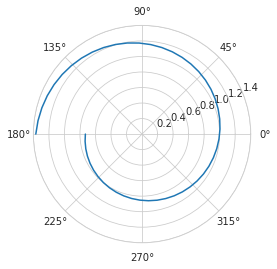

In [20]:
f = plt.figure()
polar = f.add_subplot(111, projection="polar")
# try with the logarithmic spiral
theta = np.linspace(-np.pi, np.pi)
r = np.exp(0.1*theta)
polar.plot(theta, r)

We will use the scale used in Sergeeva et al. 2021, figure 9, where $90^\circ$ in elevation correspond to zero in the r coordinate and the maximum scale correspond to zer elevation (the edge of the graph).

$90^\circ~\rightarrow~r=0$

$0^\circ~\rightarrow~r=r_{max}$
\begin{align}
r - r_0 = \frac{r_1-r_0}{E_1-E_0}\left(E - E_0\right) \\
\Rightarrow r = \frac{r_{max}}{-90^\circ}\left(E - 90^\circ\right) 
\end{align}

#### Table of yticks
|Elevation|r|
|---------|-|
|  90      |0|
|  60      | 2/3 |
|  30      | 4/3|

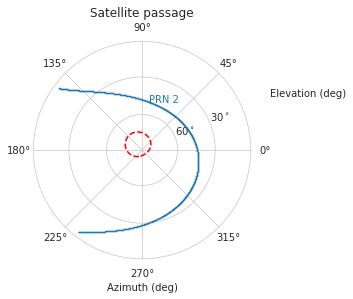

In [24]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors= prop_cycle.by_key()["color"] # array with the default color_cycle
blue = colors[0]
az_test, ele_test = Az[tab["PRN"]==2], Ele[tab["PRN"]==2]
f = plt.figure()
r = -2./(0.5*np.pi)*(np.radians(ele_test)-0.5*np.pi)
r_circ = -2./(0.5*np.pi)*(np.radians(ele_circ)-0.5*np.pi)
polar = f.add_subplot(111, projection="polar")
polar.plot(np.radians(az_test), r, ".", ms=0.5)
polar.set_yticks([0, 2./3, 4./3, 2.])
polar.set_yticklabels([r"$90^\circ$", r"$60^\circ$", r"$30^\circ$", r"$0^\circ$"])
polar.set_xlabel("Azimuth (deg)")
polar.text(0.4,2.5,"Elevation (deg)")
polar.text(np.radians(az_test)[-1], r[-1], "PRN 2", c=blue)
polar.set_title("Satellite passage")
polar.plot(np.radians(aZ_circ), r_circ, "r--")